# Importing Libraries

In [2]:
# Imports Libraries
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [3]:
# Used for styling of graphs
!pip install SciencePlots

import scienceplots
plt.style.use(['science', 'grid', 'no-latex'])

# Initialising Data

In [4]:
TOTAL_POPULATION = 1000000

# Initialises data
xData = np.array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
yData = np.array([98, 173, 279, 422, 588, 716, 854, 907, 1139, 1364, 1637, 2074, 2767, 3397])

# Data that you are predicting for
xPrediction = np.array([2025, 2028])

# Codes the data to be in a more manageable range
minXData = np.min(xData)
xData -= minXData
xPrediction -= minXData

# Model

In [5]:
# Defines the bass differential equation
def bassDifferential(F, t, p, q):
  return (p + q * F) * (1 - F)

# Solves the differential equation and subs back into the differential to get the rate
def bass(xData, p, q):
  F = odeint(bassDifferential, 0, xData, args=(p, q))[:,0]
  return bassDifferential(F, xData, p, q) * TOTAL_POPULATION

# Calculates the parameters of the model
popt, pcov = curve_fit(bass, xData, yData,
                      bounds=([0, 0], [1, 1]))

# Uses the found parameters to make a function for predictions
model = lambda xData: bass(xData, *popt)

yPrediction = model(xPrediction)
print(f'Predictions for {xPrediction + minXData} are {yPrediction}')

# Calculates the r^2 score
rSquared = r2_score(yData, model(xData))
print(f'R^2 value: {rSquared}')

print(f'p: {popt[0]}, q: {popt[1]}')

Predictions for [2025 2028] are [198.01695127 382.18892843]
R^2 value: 0.9926015387682214
p: 0.00019801695126583896, q: 0.2195442295159429


In [ ]:
# # Defines the bass function
# def bass(xData, p, q):
#   return (1 - np.exp(-(p + q) * xData)) / (1 + (q / p) * np.exp(-(p + q) * xData))

# # Defines the bass differential equation
# def bassDifferential(xData, p, q):
#   F = bass(xData, p, q)
#   return (p + q * F) * (1 - F) * TOTAL_POPULATION

In [ ]:
# # Calculates the paramaters of the model
# popt, pcov = curve_fit(bassDifferential, xData, yData,
#                        bounds=([0, 0], [1, 1]))

# # Uses the found parameters to make functions for predictions
# bassDifferentialModel = lambda xData: bassDifferential(xData, *popt)

# # Uses the model to perform a prediction
# yPrediction = bassDifferentialModel(xPrediction)
# print(f'Predictions for {xPrediction + minXData} are {yPrediction}')

# # Calculates the r^2 score
# rSquared = r2_score(yData, bassDifferentialModel(xData))
# print(f'\nR^2 value: {rSquared}')

# print(f'p: {popt[0]}, q: {popt[1]}')

# Plotting Data

In [6]:
# Initialises constants
Y_LABEL = "y-axis label"
LINE_LABEL = "Line Label"
LOWER_X, UPPER_X = 0, 30

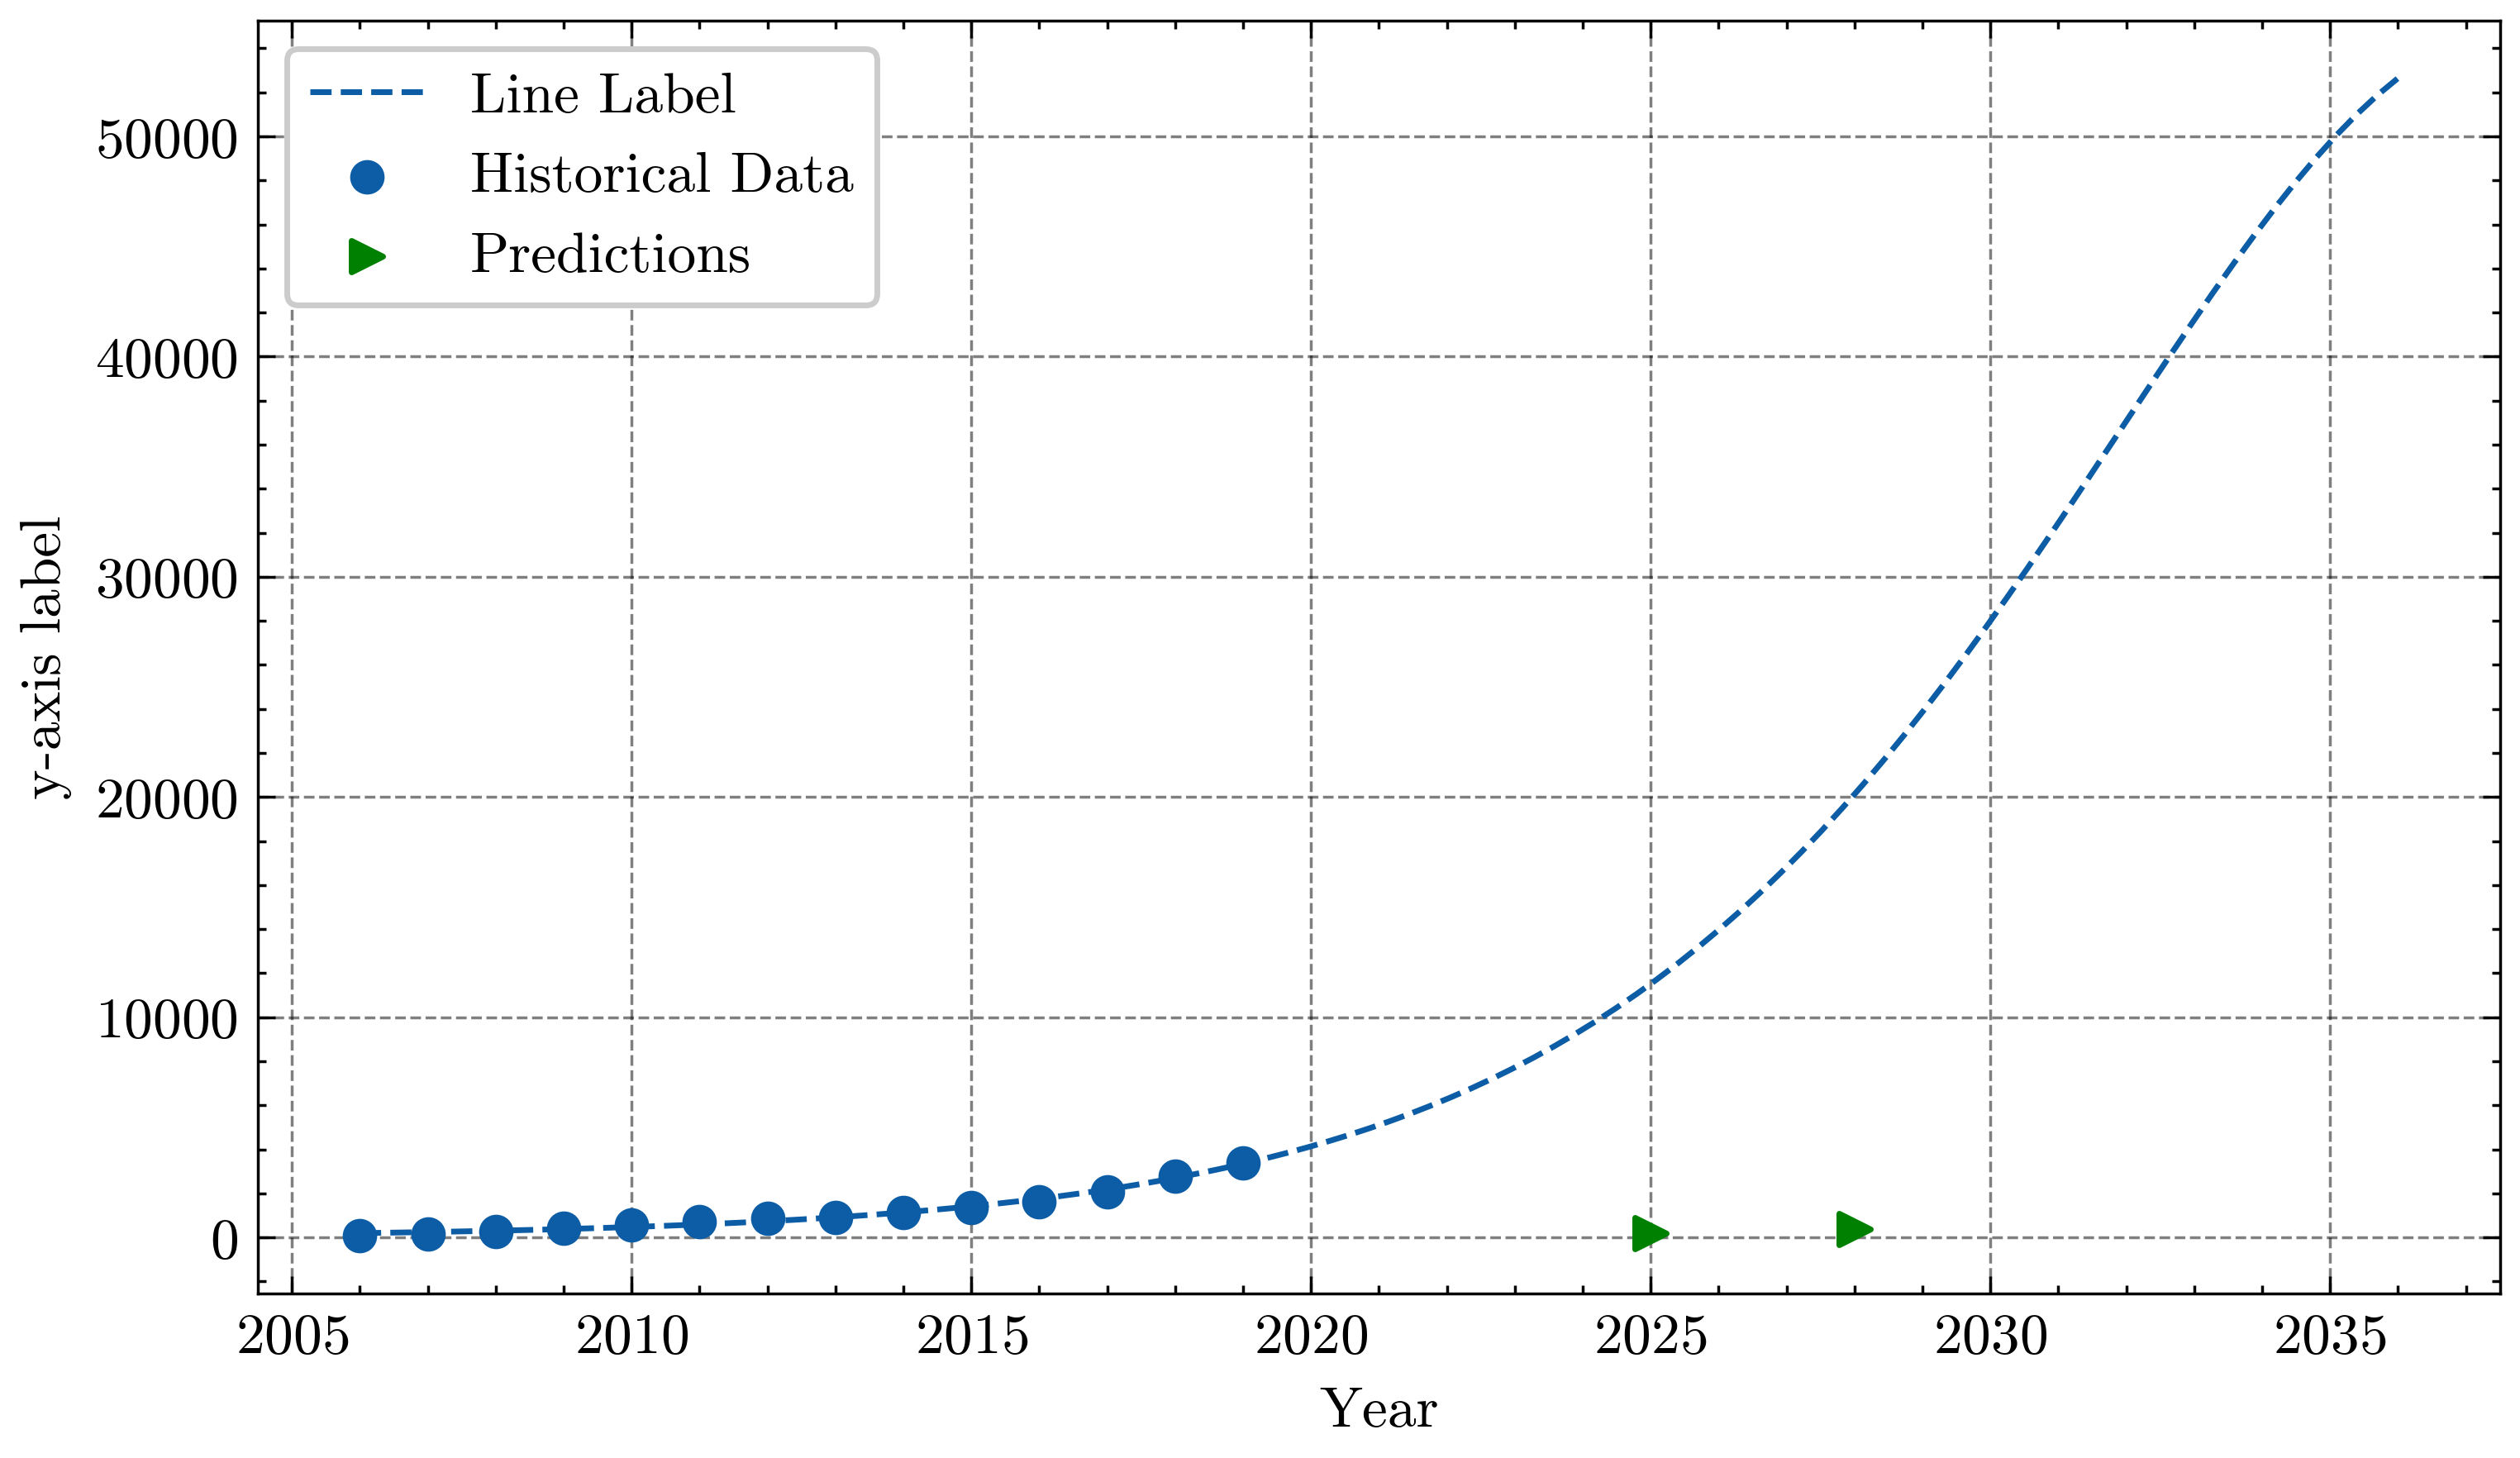

In [7]:
# Initialises settings of the graph
plt.figure(figsize=(7,4), dpi=500)

plt.xlabel('Year')
plt.ylabel(Y_LABEL)

# Plots the regression
xPlot = np.linspace(LOWER_X, UPPER_X, 100)

plt.plot(xPlot + minXData, model(xPlot), linestyle='dashed', label=LINE_LABEL)

# Plots the data and prediction points
plt.scatter(xData + minXData, yData, marker="o", s=25, label="Historical Data")
plt.scatter(xPrediction + minXData, yPrediction,
            color='green', marker=">", s=30, zorder=2, label="Predictions")

plt.legend()
plt.show()